In [1]:
import pandas as pd 
df = pd.read_csv("Speed+Dating+Data.csv", encoding='latin1')
df.head()

iid   id  gender  idg  condtn  wave  round  position  positin1  order  ...  \
0    1  1.0       0    1       1     1     10         7       NaN      4  ...   
1    1  1.0       0    1       1     1     10         7       NaN      3  ...   
2    1  1.0       0    1       1     1     10         7       NaN     10  ...   
3    1  1.0       0    1       1     1     10         7       NaN      5  ...   
4    1  1.0       0    1       1     1     10         7       NaN      7  ...   

   attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  intel5_3  \
0      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
1      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
2      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
3      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
4      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   

   fun5_3  amb5_3  
0     NaN     NaN  
1     NaN     NaN  
2     NaN     NaN  
3     NaN     NaN  
4     NaN     NaN  

[5 rows x 195 columns]

In [3]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

### Slide 1 : La perception des attributs change-t-elle avant et après un rendez-vous ?

In [4]:
#Line plot sur ce que le participant recherche initialement (signup).
# List of attributes
attributes = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

# Collect mean values dynamically
mean_values = []
for attr in attributes:
    for i in range(1, 4):
        column_name = f'{attr}1_{i}'
        mean_values.append({
            'Attribute': attr, 
            'Category': f'{i}', 
            'Mean': df[column_name].mean()
        })

# Convert to DataFrame
mean_df = pd.DataFrame(mean_values)

# Plotting with Plotly Express
fig = px.line(mean_df, x='Attribute', y='Mean', color='Category', markers=True, 
              title='Graphique 1 : We want to know what you look for in the opposite sex. ')
fig.show()

In [5]:
#Line plot sur ce que le sexe opposé recherche 

# List of attributes
attributes = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

# Collect mean values dynamically
mean_values = []
for attr in attributes:
    for i in range(1, 4):
        column_name = f'{attr}2_{i}'
        mean_values.append({
            'Attribute': attr, 
            'Category': f'{i}', 
            'Mean': df[column_name].mean()
        })

# Convert to DataFrame
mean_df = pd.DataFrame(mean_values)

# Plotting with Plotly Express
fig = px.line(mean_df, x='Attribute', y='Mean', color='Category', markers=True, 
              title='What do you think the opposite sex looks for in a date?')
fig.show()

In [6]:
# List of attributes
attributes = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

# Collect mean values dynamically
mean_values = []
for attr in attributes:
    for i in range(1, 4):
        column_name = f'{attr}4_{i}'
        mean_values.append({
            'Attribute': attr, 
            'Category': f'{i}', 
            'Mean': df[column_name].mean()
        })

# Convert to DataFrame
mean_df = pd.DataFrame(mean_values)

# Plotting with Plotly Express
fig = px.line(mean_df, x='Attribute', y='Mean', color='Category', markers=True, 
              title='what you think MOST of your fellow men/women look for in the opposite sex.')
fig.show()

### Les attributs déclarés lors de l'inscription sont-ils ceux qui influencent réellement les décisions après le rendez-vous ?

In [7]:
df_dec_yes = df[df["match"]==1]

In [8]:
# List of attributes
attributes = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

# Collect mean values dynamically
mean_values = []
for attr in attributes:
        column_name = f'{attr}'
        mean_values.append({
            'Attribute': attr, 
            'Mean': df_dec_yes[column_name].mean()
        })

# Convert to DataFrame
mean_df = pd.DataFrame(mean_values)

# Plotting with Plotly Express
fig = px.line(mean_df, x='Attribute', y='Mean', markers=True, 
              title='Scorecard evaluation when the decision is yes')
fig.show()

In [9]:
df_dec_no = df[df["match"]==0]
# List of attributes
attributes = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

# Collect mean values dynamically
mean_values = []
for attr in attributes:
        column_name = f'{attr}'
        mean_values.append({
            'Attribute': attr, 
            'Mean': df_dec_no[column_name].mean()
        })

# Convert to DataFrame
mean_df = pd.DataFrame(mean_values)

# Plotting with Plotly Express
fig = px.line(mean_df, x='Attribute', y='Mean', markers=True, 
              title='Scorecard evaluation when the decision is no ')
fig.show()

In [10]:
import plotly.graph_objects as go

# First set of data (Mean per attribute category)
# List of attributes
attributes = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

# Collect mean values dynamically
mean_values_1 = []
for attr in attributes:
    for i in range(1,4):  # Using just 2 categories for simplicity, change to 4 if needed
        column_name = f'{attr}1_{i}'
        mean_values_1.append({
            'Attribute': attr, 
            'Category': f'{i}', 
            'Mean': df[column_name].mean()
        })

# Convert to DataFrame
mean_df_1 = pd.DataFrame(mean_values_1)

# Second set of data (Overall Mean per attribute)
mean_values_2 = []
for attr in attributes:
    column_name = f'{attr}'
    mean_values_2.append({
        'Attribute': attr, 
        'Mean': df_dec_yes[column_name].mean()
    })

# Convert to DataFrame
mean_df_2 = pd.DataFrame(mean_values_2)

# Create the figure with two y-axes
fig = go.Figure()

# Add the first trace (line with multiple categories on primary y-axis)
for category in mean_df_1['Category'].unique():
    fig.add_trace(go.Scatter(
        x=mean_df_1[mean_df_1['Category'] == category]['Attribute'],
        y=mean_df_1[mean_df_1['Category'] == category]['Mean'],
        mode='lines+markers',
        name=f'Form {category}',
        yaxis='y1'
    ))

# Add the second trace (overall mean on secondary y-axis)
fig.add_trace(go.Scatter(
    x=mean_df_2['Attribute'],
    y=mean_df_2['Mean'],
    mode='lines+markers',
    name='ScoreCard',
    yaxis='y2'
))

# Update the layout to include two y-axes
fig.update_layout(
    title='Comparison importance and scorecard evaluation',
    xaxis_title='Attribute',
    
    # Y-Axis on the left (primary)
    yaxis=dict(
        title='Mean by form',
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue')
    ),
    
    # Y-Axis on the right (secondary)
    yaxis2=dict(
        title='ScoreCard',
        titlefont=dict(color='violet'),
        tickfont=dict(color='violet'),
        overlaying='y',  # Overlays the y-axis
        side='right'     # Puts this axis on the right side
    ),
    
    # General settings
    legend_title="Legend",
    template='plotly_white')

### Quelles sont les caractéristiques les moins désirables chez un partenaire masculin ? Différences pour les partenaires féminines ?

In [11]:
attributes = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

mean_values_homme = []
mean_values_femme = []

for attr in attributes:
    for i in range(1, 4):  
        column_name_homme = f'{attr}1_{i}'
        mean_values_homme.append({
            'Attribute': attr, 
            'Category': f'{i}', 
            'Mean': df_male[column_name_homme].mean()
        })

        column_name_femme = f'{attr}1_{i}'  
        mean_values_femme.append({
            'Attribute': attr, 
            'Category': f'{i}', 
            'Mean': df_female[column_name_femme].mean()
        })

# Creating DataFrames for hommes and femmes
mean_df_homme = pd.DataFrame(mean_values_homme)
mean_df_femme = pd.DataFrame(mean_values_femme)

# Plotting
fig = go.Figure()

# Adding homme trace
fig.add_trace(go.Bar(
    x = mean_df_homme["Attribute"],
    y = mean_df_homme["Mean"],
    name = "Homme"
))

# Adding femme trace
fig.add_trace(go.Bar(
    x = mean_df_femme["Attribute"],
    y = mean_df_femme["Mean"], 
    name = "Femme"
))

# Updating layout
fig.update_layout(
    title='Somme des moyenne des attributs homme/femme à la question ce qu ils recherchent) ',
    xaxis_title='Attributs',
    yaxis_title='Moyenne'
)

fig.show()

    

NameError: name 'df_male' is not defined

In [ ]:
df_male = df[df["gender"]==1]
df_female = df[df["gender"]==0]
df_male_yes = df_male[df_male["dec"] == 0]
df_female_yes = df_female[df_female["dec"] == 0]

In [ ]:
attributes = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']


mean_values = []
for attr in attributes:
        column_name = f'{attr}'
        mean_values.append({
            'Attribute': attr, 
            'Mean': df_male_yes[column_name].mean()
        })


mean_df = pd.DataFrame(mean_values)

mean_values2 = []
for attr in attributes:
        column_name = f'{attr}'
        mean_values2.append({
            'Attribute': attr, 
            'Mean': df_female_yes[column_name].mean()
        })


mean_df2 = pd.DataFrame(mean_values2)

fig = go.Figure()
fig.add_trace(go.Bar(
        x = mean_df["Attribute"],
        y = mean_df["Mean"],
        name = "Homme"
))

fig.add_trace(go.Bar(
        x = mean_df2["Attribute"],
        y = mean_df2["Mean"], 
        name = "Femme"
))
fig.update_layout(
    title='Moyenne des attributs homme/femme suite au date',
    xaxis_title='Attributs')
    

fig.show()

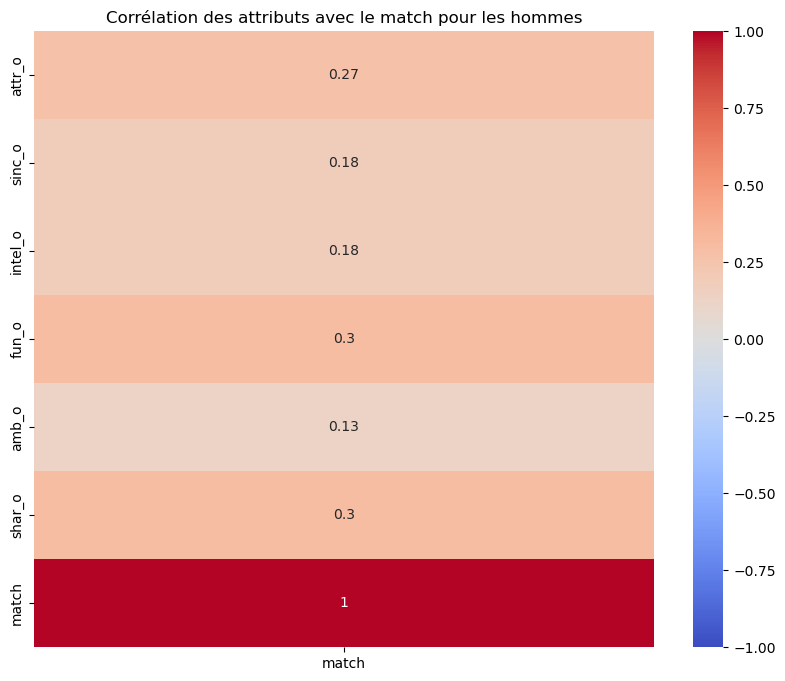

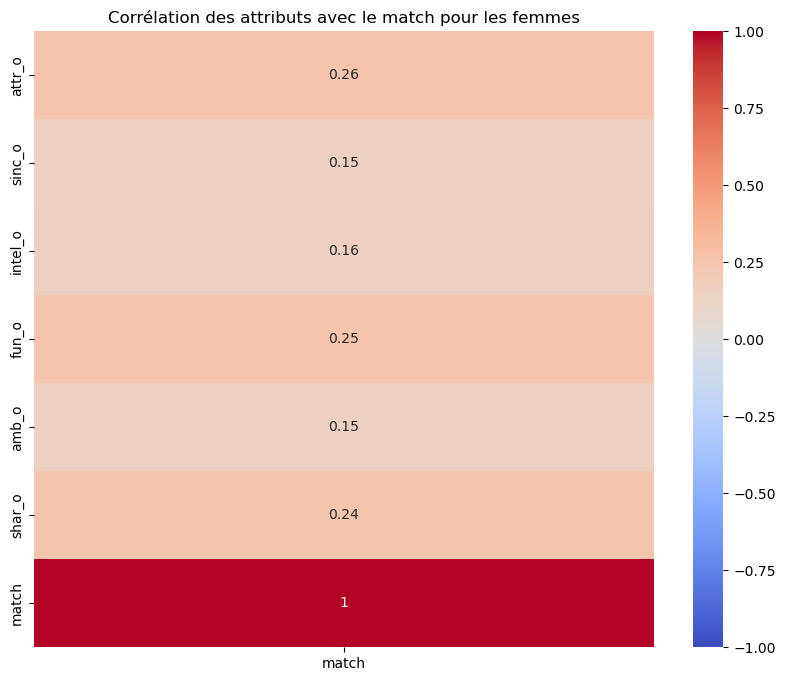

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Sélection des colonnes d'intérêt : décisions de match et attributs (attractivité, sincérité, etc.)
# Suppose que 'match' est la variable indiquant s'il y a eu un match (1 = oui, 0 = non)
# Les colonnes attr_o, sinc_o, etc. sont les notes données pour chaque attribut
attributes = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']
correlation_data = df[attributes + ['match', 'gender']]

# Séparation des genres (0 = Femmes, 1 = Hommes)
male_data = correlation_data[correlation_data['gender'] == 1]
female_data = correlation_data[correlation_data['gender'] == 0]

# Calcul des corrélations
corr_male = male_data.corr()
corr_female = female_data.corr()

# Heatmap pour les hommes
plt.figure(figsize=(10, 8))
sns.heatmap(corr_male[['match']].drop('gender'), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Corrélation des attributs avec le match pour les hommes")
plt.show()

# Heatmap pour les femmes
plt.figure(figsize=(10, 8))
sns.heatmap(corr_female[['match']].drop('gender'), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Corrélation des attributs avec le match pour les femmes")
plt.show()

### Quelle est l'importance que les gens accordent à l'intelligence dans la sélection d'un partenaire potentiel par rapport à son impact réel ? To do 


In [ ]:
fig = px.box(df, x = "gender", y = "intel1_1", title = "Distribution de la notation sur l'intelligence au moment du sign up(importance) en fonction genre")
fig.show()

In [ ]:
fig = px.box(df, x = "match", y = "intel", title = "Distribution de la notation de l'intelligence suite au date en fonction de match ou non")
fig.show()

In [21]:
fig = px.box(df, x = "match", y = "fun", title=" Distribution de la notation de l'intelligence suite au date en fonction de la décision")
fig.show()

In [ ]:

fig = px.box(df, x = "match", y="intel2_1", title = "Distribution de la notation de l'intelligence (Ce que recherche le sexe opposé) en fonction de match ou non")
fig.show()

In [ ]:
match_yes = df[df['match'] == 1]
match_no = df[df['match'] == 0]

print("Moyenne des notes pour les matchs suite à la scorecard:")
print(match_yes[['intel', 'attr', 'fun']].mean())

print("Moyenne des notes pour les non-matchs suite à la scorecard:")
print(match_no[['intel', 'attr', 'fun']].mean())

Moyenne des notes pour les matchs suite à la scorecard:
intel    7.950365
attr     7.319535
fun      7.598535
dtype: float64
Moyenne des notes pour les non-matchs suite à la scorecard:
intel    7.249851
attr     5.961230
fun      6.155185
dtype: float64


In [ ]:
#ce que le sexe opposé recherche 
match_yes = df[df['match'] == 1]
match_no = df[df['match'] == 0]

print("Moyenne des notes pour les matchs:")
print(match_yes[['intel2_1', 'attr2_1', 'fun2_1']].mean())

print("Moyenne des notes pour les non-matchs:")
print(match_no[['intel2_1', 'attr2_1', 'fun2_1']].mean())

Moyenne des notes pour les matchs:
intel2_1    14.788176
attr2_1     30.964813
fun2_1      18.274601
dtype: float64
Moyenne des notes pour les non-matchs:
intel2_1    14.343802
attr2_1     30.243562
fun2_1      18.451758
dtype: float64


### Les intérêts communs sont-ils plus importants qu'une même origine racial partagé ?



In [30]:
#% de same race
df_samerace= df["samerace"].value_counts().reset_index()
rename_dict = {1: 'Same origin', 0: 'Different origin'}
df_samerace['samerace'] = df_samerace['samerace'].map(rename_dict)

# Créer un pie chart avec go.Figure
fig = go.Figure(data=[go.Pie(labels=df_samerace['samerace'], values=df_samerace['count'], marker=dict(colors=['#FD2C72', '#FE4A51']))])

# Ajouter un titre
fig.update_layout(title_text="% of same ethnic origin  (Participants)", width=500)

# Afficher le graphique
fig.show()

In [ ]:
df_question3 = df.groupby("samerace")["match"].sum().reset_index()
df_question3

samerace  match
0         0    814
1         1    566

In [31]:
df_question3 = df.groupby("samerace")["match"].sum().reset_index()

rename_dict = {1: 'Same origin', 0: 'different origin'}
df_question3['samerace'] = df_question3['samerace'].map(rename_dict)

# Créer un pie chart avec go.Figure
fig = go.Figure(data=[go.Pie(labels=df_question3['samerace'], values=df_question3['match'], marker=dict(colors=['#FD2C72', '#FE4A51']))])

# Ajouter un titre
fig.update_layout(title_text="% of matches with the same ethnic origin",width=500)

# Afficher le graphique
fig.show()

In [38]:
fig = go.Figure()
fig.add_trace(go.Box(
    x = df["match"],
    y = df["shar"]
))


fig.update_layout(
    title="Shared interest rating following the match date",
    yaxis_title="Shared interests (Notation)",
    xaxis_title="Match (1 = Yes, 0 = No)",width=500)

fig.show()

In [41]:
fig = go.Figure()
fig.add_trace(go.Box(
    x = df["match"],
    y = df["imprace"]
))

fig.update_layout(
    title="Importance of the same origin following the date",
    yaxis_title="Importance of the same ethnic origin(Notes)",
    xaxis_title="Match",width=500)

fig.show()


In [46]:


df_question3 = df.groupby("int_corr")["match"].sum().reset_index()


fig = px.histogram(df_question3, x= "int_corr", y = "match" , title = "Nb of matches according to the correlation of shared interests", width = 600)
fig.show()

In [ ]:
#Comparaison de la moyenne de la notation des intérês partagés durant le signup (importance) et suite au date
print("Signup:")
print(df["shar1_1"].mean())
print("Scorecard")
print(df["shar"].mean())


Signup:
11.845110815066004
Scorecard
5.474558883873615


In [ ]:

race_mean_match = df[df['match'] == 1]['imprace'].mean()
interests_mean_match = df[df['match'] == 1]['shar'].mean()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=['Origine raciale partagée'],
    y=[race_mean_match],
    name='Origine raciale partagée',
    marker_color='blue'
))

fig.add_trace(go.Bar(
    x=['Intérêts partagés'],
    y=[interests_mean_match],
    name='Intérêts partagés',
    marker_color='green'
))

fig.update_layout(
    title="Comparaison de l'impact de l'origine raciale partagée et des intérêts communs sur les matchs",
    xaxis_title="Attribut",
    yaxis_title="Impact moyen sur les matchs (Notes moyennes)",
    showlegend=True
)

fig.show()

### Les participants peuvent-ils prédire leur propre valeur perçue sur le marché des rencontres ?


In [ ]:
#Faire la différence des attributs des parteneaires et comme la personne s'évalue
df["diff_attr_estimation"] = df["attr_o"] - df["attr5_1"]
df["diff_sinc_estimation"] = df["sinc_o"] - df["sinc5_1"]
df["diff_intel_estimation"] = df["intel_o"] - df["intel5_1"]
df["diff_fun_estimation"] = df["fun_o"] - df["fun5_1"]
df["diff_amb_estimation"] = df["amb_o"] - df["amb5_1"]


In [ ]:
fig = px.histogram(df, x="diff_attr_estimation")
fig.show(
)

In [ ]:
fig = px.histogram(df, x="prob", y = "dec_o", title = "Nombre de décisions en fonction de la probabilité évaluée par le participant")

fig.show()

In [ ]:
df_group_match = df.groupby("iid")[["expnum", "match", "match_es"]].sum().reset_index()

df_group_match_expected = df.groupby("iid")[["expnum", "match",  "match_es"]].mean().reset_index()

fig = px.histogram(df_group_match_expected, x=["match"], title = "Distribution de la probabilité de match réalisé par personne")
fig.show()
df_group_match_expected["round"] = df["round"]
df_group_match_expected["proba_match_es"] = df_group_match_expected["match_es"]/df_group_match_expected ["round"]
df_group_match_expected = df_group_match_expected.dropna(subset=["match_es", "round"])

fig2 = px.histogram(df_group_match_expected, x="proba_match_es", title = "Probabilité de match estimé à mi-parcours par personne")
fig2.show()

### En termes d'obtenir un deuxième rendez-vous, vaut-il mieux être le premier speed date de la soirée ou le dernier ?

In [ ]:
#Création de 5 sous-groupes pour comparer les waves
df_round_0_6 = df[(df["round"] >= 0) & (df["round"] <= 6)]

df_round_7_10 = df[(df["round"] >= 7) & (df["round"] <= 10)]

df_round_11_15 = df[(df["round"] >= 11) & (df["round"] <= 15)]

df_round_sup_16 = df[df["round"] >= 16]

In [ ]:
# Calculer le nombre de matchs pour chaque ordre de rendez-vous dans chaque groupe
matches_by_order_0_6 = df_round_0_6.groupby('order')['match'].sum().reset_index()
matches_by_order_7_10 = df_round_7_10.groupby('order')['match'].sum().reset_index()
matches_by_order_11_15 = df_round_11_15.groupby('order')['match'].sum().reset_index()
matches_by_order_sup_16 = df_round_sup_16.groupby('order')['match'].sum().reset_index()

In [ ]:
fig = go.Figure()

# Ajouter la première trace (Rounds 0-6)
fig.add_trace(go.Scatter(
    x=matches_by_order_0_6['order'],
    y=matches_by_order_0_6['match'],
    mode='lines+markers',
    name='Rounds 0-6',
    line=dict(color='blue'),
    marker=dict(symbol='circle')
))

# Ajouter la deuxième trace (Rounds 7-10)
fig.add_trace(go.Scatter(
    x=matches_by_order_7_10['order'],
    y=matches_by_order_7_10['match'],
    mode='lines+markers',
    name='Rounds 7-10',
    line=dict(color='green'),
    marker=dict(symbol='circle')
))

# Ajouter la troisième trace (Rounds 11-15)
fig.add_trace(go.Scatter(
    x=matches_by_order_11_15['order'],
    y=matches_by_order_11_15['match'],
    mode='lines+markers',
    name='Rounds 11-15',
    line=dict(color='orange'),
    marker=dict(symbol='circle')
))

# Ajouter la quatrième trace (Rounds >= 16)
fig.add_trace(go.Scatter(
    x=matches_by_order_sup_16['order'],
    y=matches_by_order_sup_16['match'],
    mode='lines+markers',
    name='Rounds ≥ 16',
    line=dict(color='red'),
    marker=dict(symbol='circle')
))

# Personnaliser les titres et les labels des axes
fig.update_layout(
    title="Comparaison du nombre de matchs en fonction de l'ordre des rendez-vous",
    xaxis_title="Ordre des rendez-vous",
    yaxis_title="Nombre de matchs",
    legend=dict(x=0.8, y=0.95),  # Position de la légende,
    width = 800,

    height = 500,
    showlegend=True
)

# Afficher le graphique
fig.show()

In [5]:
# Préparation des données
attributes_data = df[['round', 'order', 'attr', 'fun', 'sinc', 'match']]
attributes_data['order_normalized'] = attributes_data['order'] / attributes_data['round']
attributes_by_order_normalized = attributes_data.groupby('order_normalized').mean().reset_index()

# Création du graphique avec couleur personnalisée
fig = px.histogram(attributes_data, x="order_normalized", y="match", 
                   color_discrete_sequence=['#FD2C72'])

fig.update_layout(title='Number of matches depending on the normalized order')


# Affichage du graphique
fig.show()


C:\Users\leasc\AppData\Local\Temp\ipykernel_5164\591333768.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Est-ce que le lifestyle influence les matchs ? 

In [ ]:
fig =go.Figure()
fig.add_trace(go.Histogram(
    x = df["concerts"],
    y = df["match"],
    name = "concerts"
))

fig.add_trace(go.Histogram(
    x = df["yoga"],
    y = df["match"], 
    name="yoga"
))

fig.add_trace(go.Histogram(
    x = df["clubbing"],
    y = df["match"], 
    name = "clubbing"
))
fig.add_trace(go.Histogram(
    x = df["theater"],
    y = df["match"], 
    name = "Theater"
))
fig.add_trace(go.Histogram(
    x = df["music"],
    y = df["match"], 
    name = "music"
))

fig.add_trace(go.Histogram(
    x = df["hiking"],
    y = df["match"], 
    name = "hiking"
))
fig.update_layout(
    title = "Comparaison des Hobbies en fonction des matchs",
    xaxis_title ="Note donnée aux Hobbies",
    yaxis_title = "Nombre de match"
)
fig.show()

In [6]:
fig = px.histogram(df, x="go_out", y="match", 
                   color_discrete_sequence=['#FD2C72'],
                   title="Distribution of Matches Based on Outing Habits")

# Affichage du graphique
fig.show()

In [7]:
# Préparation des données
df_go_out = df["go_out"].value_counts().reset_index()
df_go_out.columns = ['go_out', 'count']  # Renommer les colonnes pour la cohérence

# Création du graphique avec couleur personnalisée et titre en anglais
fig = px.histogram(df_go_out, x="go_out", y="count", 
                   color_discrete_sequence=['#FD2C72'],
                   title="Distribution of Outing Habits")

# Affichage du graphique
fig.show()

In [56]:
fig = px.histogram(df, x = "date", y = "match", title = "Nb de matchs en fonction des habitudes de date", width=500)
fig.show()

In [55]:
df_date = df["date"].value_counts().reset_index()
fig = px.histogram(df_date, x= "date", y  = "count", title = "Distribution des habitudes de date", width=500)
fig.show()

In [22]:
df_match = df[df["match"] == 1]
df_match_no = df[df["match"]==0]



In [ ]:
fig = px.histogram(df, x = "goal", y = "match",title = "Distribution des matchs en fonctions de l'objectif de l'évènement")
fig.show()

In [23]:
fig = px.histogram(df, x = "goal",title = "Distribution des matchs en fonctions de l'objectif de l'évènement")
fig.show()

In [29]:
df_round = df.groupby('round')["match"].mean().reset_index()
display(df_round)

fig = px.bar(df_round, x="round", y="match", title="Mean of match depending on the size of the wave", color_discrete_sequence=['#FD2C72'])

# Ajout de la ligne horizontale à y=0.15
fig.add_shape(type="line", 
              x0=0, x1=1, y0=0.15, y1=0.15, 
              line=dict(color="LightSeaGreen", width=2), 
              xref='paper', yref='y')

fig.show()

round     match
0       5  0.200000
1       6  0.141975
2       7  0.119048
3       8  0.250000
4       9  0.182540
5      10  0.220455
6      11  0.171429
7      14  0.124060
8      15  0.164444
9      16  0.143382
10     18  0.189630
11     19  0.145511
12     20  0.161207
13     21  0.145125
14     22  0.148760

In [41]:
df_career = df.groupby("career_c")["match"].sum().reset_index()
df_career.head()

career_c  match
0       1.0    134
1       2.0    360
2       3.0     54
3       4.0     70
4       5.0     36

In [40]:
df_career_count = df["career_c"].value_counts().reset_index()
df_career_count.head()


career_c  count
0       2.0   2320
1       7.0   2170
2       6.0    724
3       1.0    675
4       9.0    547

In [42]:
# Préparation des données
df_career = df.groupby("career_c")["match"].sum().reset_index()
df_career.columns = ['career_c', 'total_match']

df_career_count = df["career_c"].value_counts().reset_index()
df_career_count.columns = ['career_c', 'count']

# Création du graphique
fig = go.Figure()

# Ajout de la trace pour la somme des matchs
fig.add_trace(go.Bar(
    x=df_career['career_c'],
    y=df_career['total_match'],
    name='Total Matches',
    marker_color='#FD2C72'
))

# Ajout de la trace pour le nombre d'occurrences
fig.add_trace(go.Bar(
    x=df_career_count['career_c'],
    y=df_career_count['count'],
    name='Count',
    marker_color='#1f77b4'
))

# Mise à jour de la mise en page du graphique
fig.update_layout(
    title='Distribution of Matches and Career Counts',
    xaxis_title='Career Category',
    yaxis_title='Count',
    barmode='overlay',  # Superposition des barres
)

# Affichage du graphique
fig.show()
